In [4]:
from os.path import split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sqlalchemy.dialects.mssql.information_schema import columns

In [ ]:
df = pd.read_csv('data/Filosofi2017_carreaux_200m_met.csv', low_memory=False)
df.drop(['Idcar_200m', 'Idcar_1km', 'I_est_1km', 'Idcar_nat', 'lcog_geo'], axis=1, inplace=True)
df = df.sample(frac=0.01, random_state=42)
df

In [5]:
X = StandardScaler().fit_transform(df)

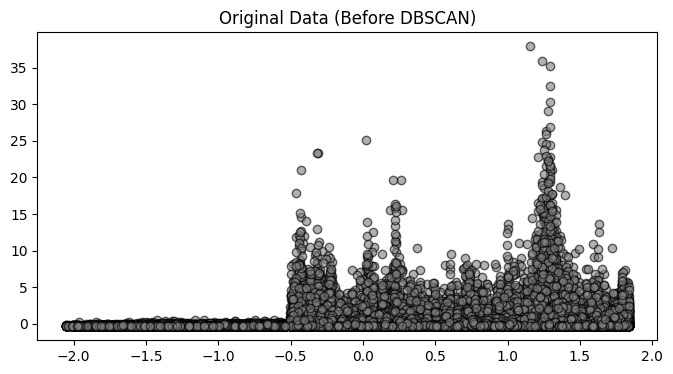

In [6]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 1], X[:, 2], c='gray', alpha=0.6, edgecolors='k')
plt.title("Original Data (Before DBSCAN)")
plt.show()

In [1]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

NameError: name 'DBSCAN' is not defined

In [ ]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for label, color in zip(unique_labels, colors):
    cluster_points = X[labels == label]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {label}', alpha=0.6, edgecolors='k')

plt.title("Clustering avec DBSCAN")
plt.legend()
plt.show()